<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №4</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Кластеризацiя засобами
бiблiотеки Scikit-Learn Python <b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>


<b>Хід роботи:</b>
1.  Представити початковi данi графiчно.
2.  Побудувати модель кластеризацiї згiдно з варiантом.
3.  Виконати кластеризацiю даних на основi моделi.
4.  Представити розбиття на кластери графiчно (наприклад, рiзними кольорами).
5.  Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок до 100 000 i бiльше).
6.  Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi;
    * використати рiзнi функцiї вiдстанi (де це можливо);
    * задати рiзнi значення кiлькостi кластерiв (де це параметр).
7.  Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї з `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Estimated Number of Clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Homogeneity
    * Completeness
    * V-measure
    * Silhouette Coefficient
    * Calinski-Harabasz Index
    * Davies-Bouldin index
    * Contingency Matrix
8.  Виконати аналiз результатiв одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних?
    * чи є розбиття стабiльним пiсля видалення окремих об’єктiв?
    * чи є розбиття стабiльним пiсля змiни порядку об’єктiв?
    * чи iснує взаємозв’язок мiж результатами i змiнними, якi не враховувалися?
    * чи можна iнтерпретувати результати?
9.  Виконати пункти 1-8 для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей та про швидкодiю методу.
11. Оцiнити результати (на основi метрик та неформальних методiв). Спробувати пiдiбрати найкращу модель для кожного набору даних
## Завдання (Варіант 12)
* **Алгоритм:** `Birch`
* **Метрики якостi:**
    * Estimated number of clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Silhouette Coefficient
* **Неформальний метод:**
    * Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?
* **Початковi данi:**
    1.  `sklearn.datasets.make_moons`
    2.  `sklearn.datasets.load_iris`


КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ

📁 Завантаження даних з: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_dataset.csv

✅ Дані успішно завантажено!

----------------------------------------------------------------------
1.1 БАЗОВА ІНФОРМАЦІЯ ПРО ДАТАСЕТ
----------------------------------------------------------------------

📊 Розмірність датасету: (150, 5)
   - Кількість зразків: 150
   - Кількість ознак: 4 (без target)

📋 Перші 5 рядків:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0

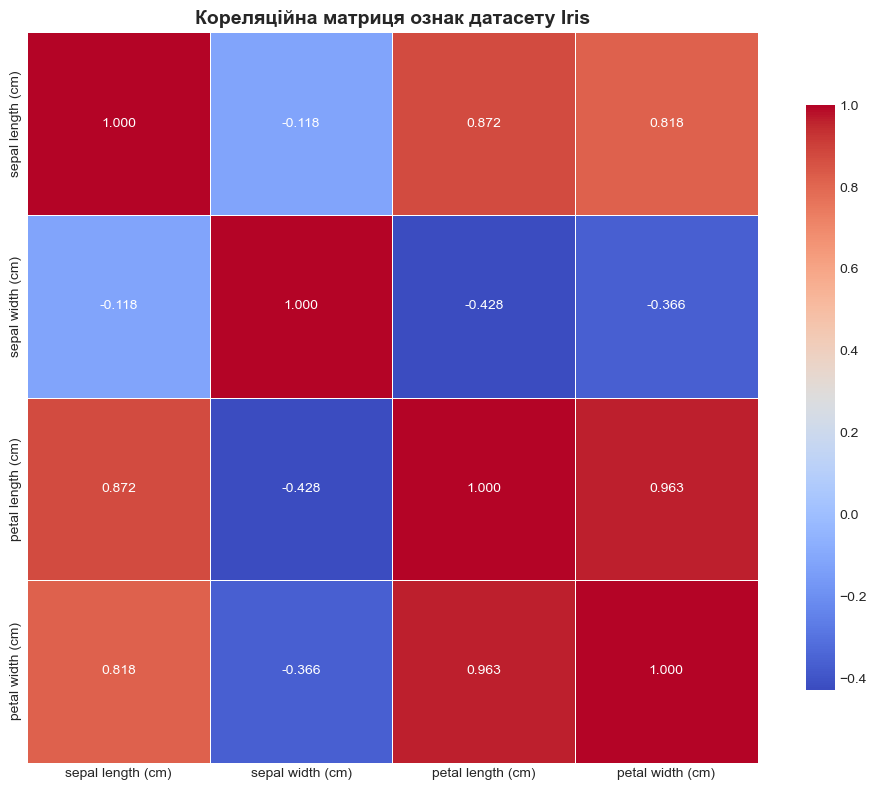


📊 Створення box plots для кожної ознаки...


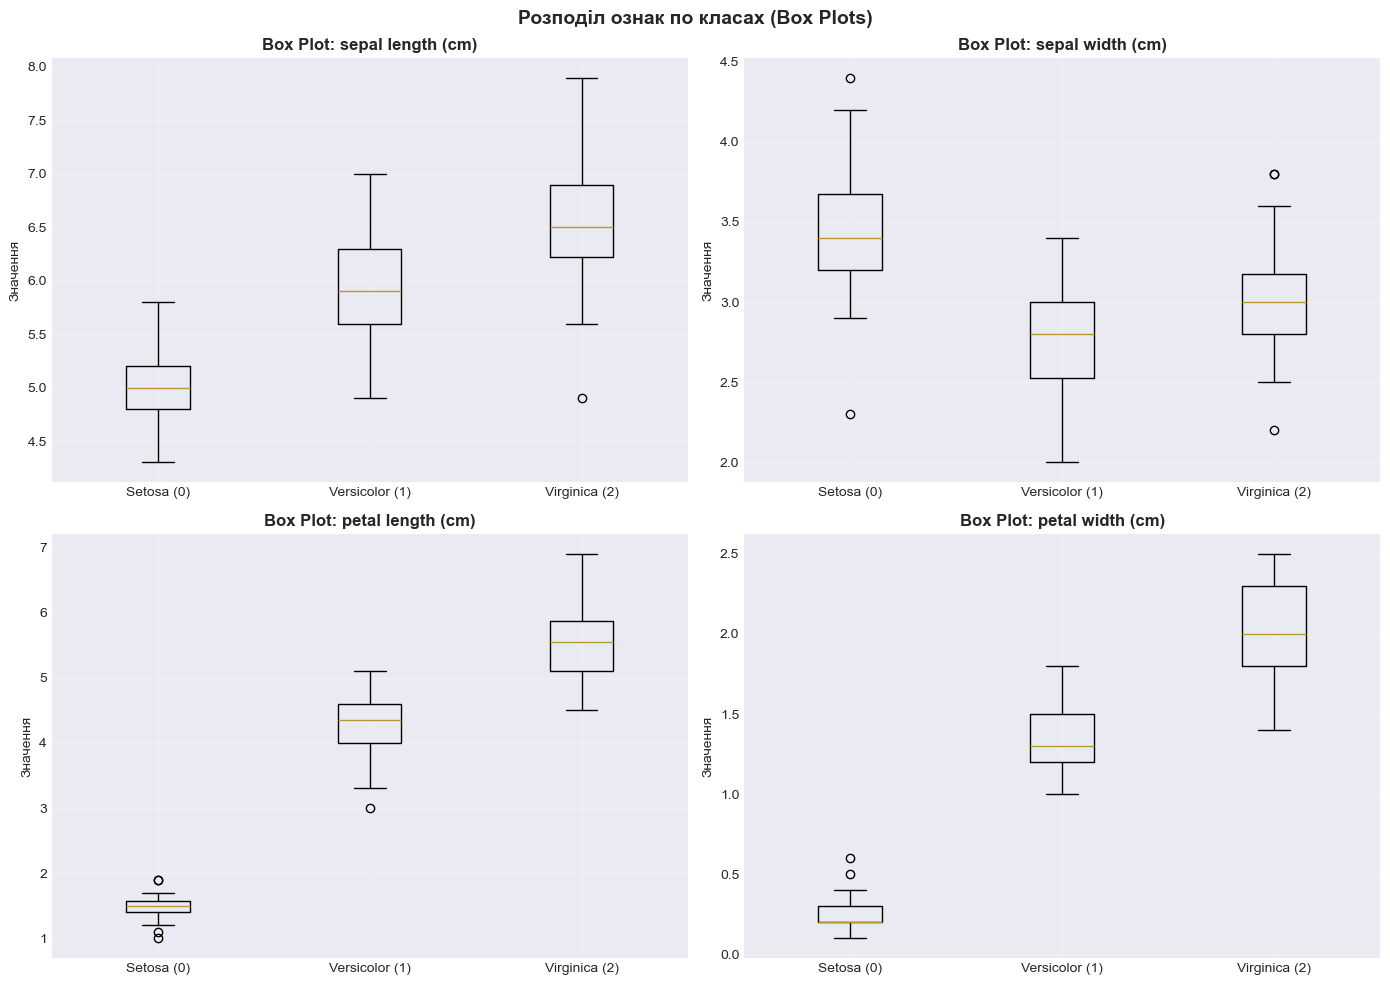


📊 Створення pair plot (може зайняти кілька секунд)...


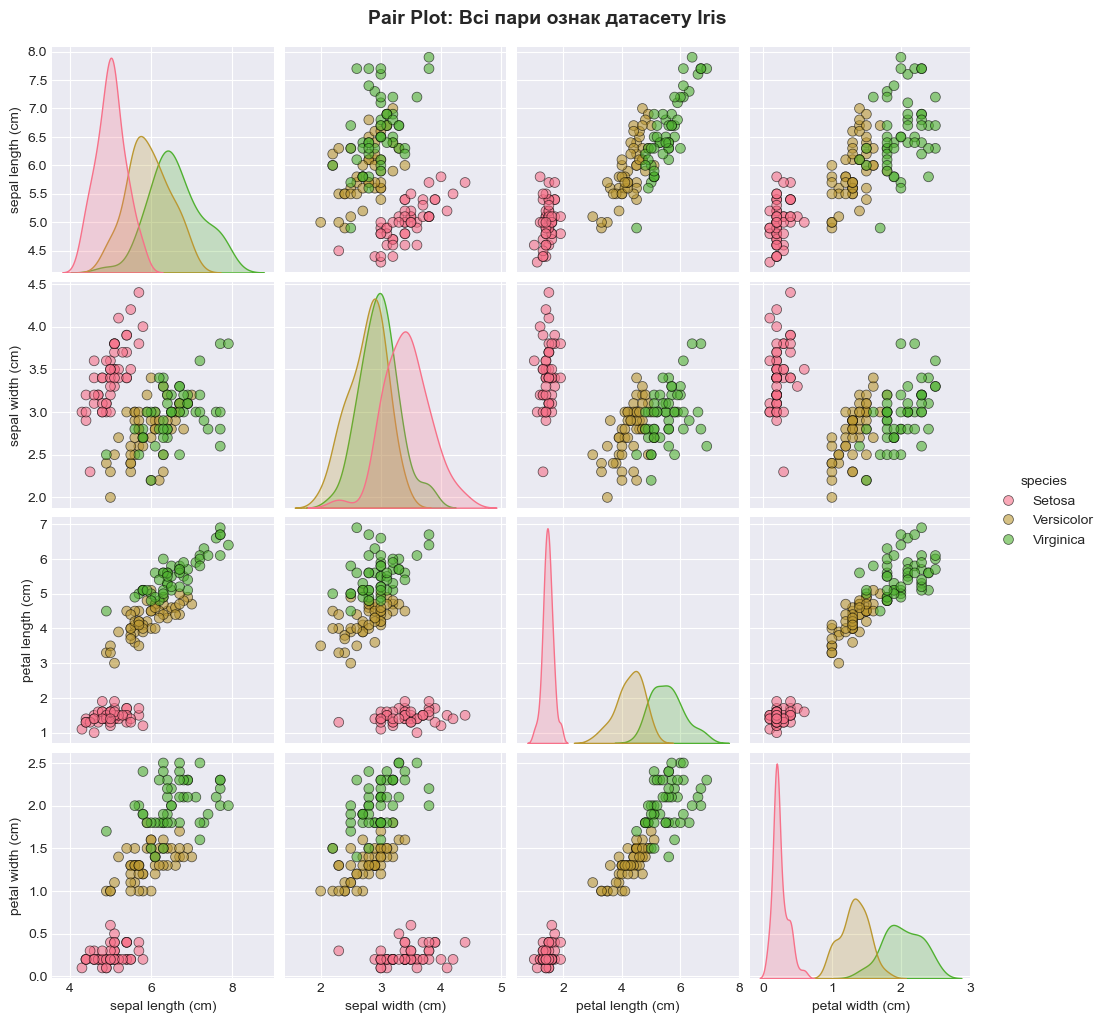


📊 Створення scatter plots для всіх пар ознак...


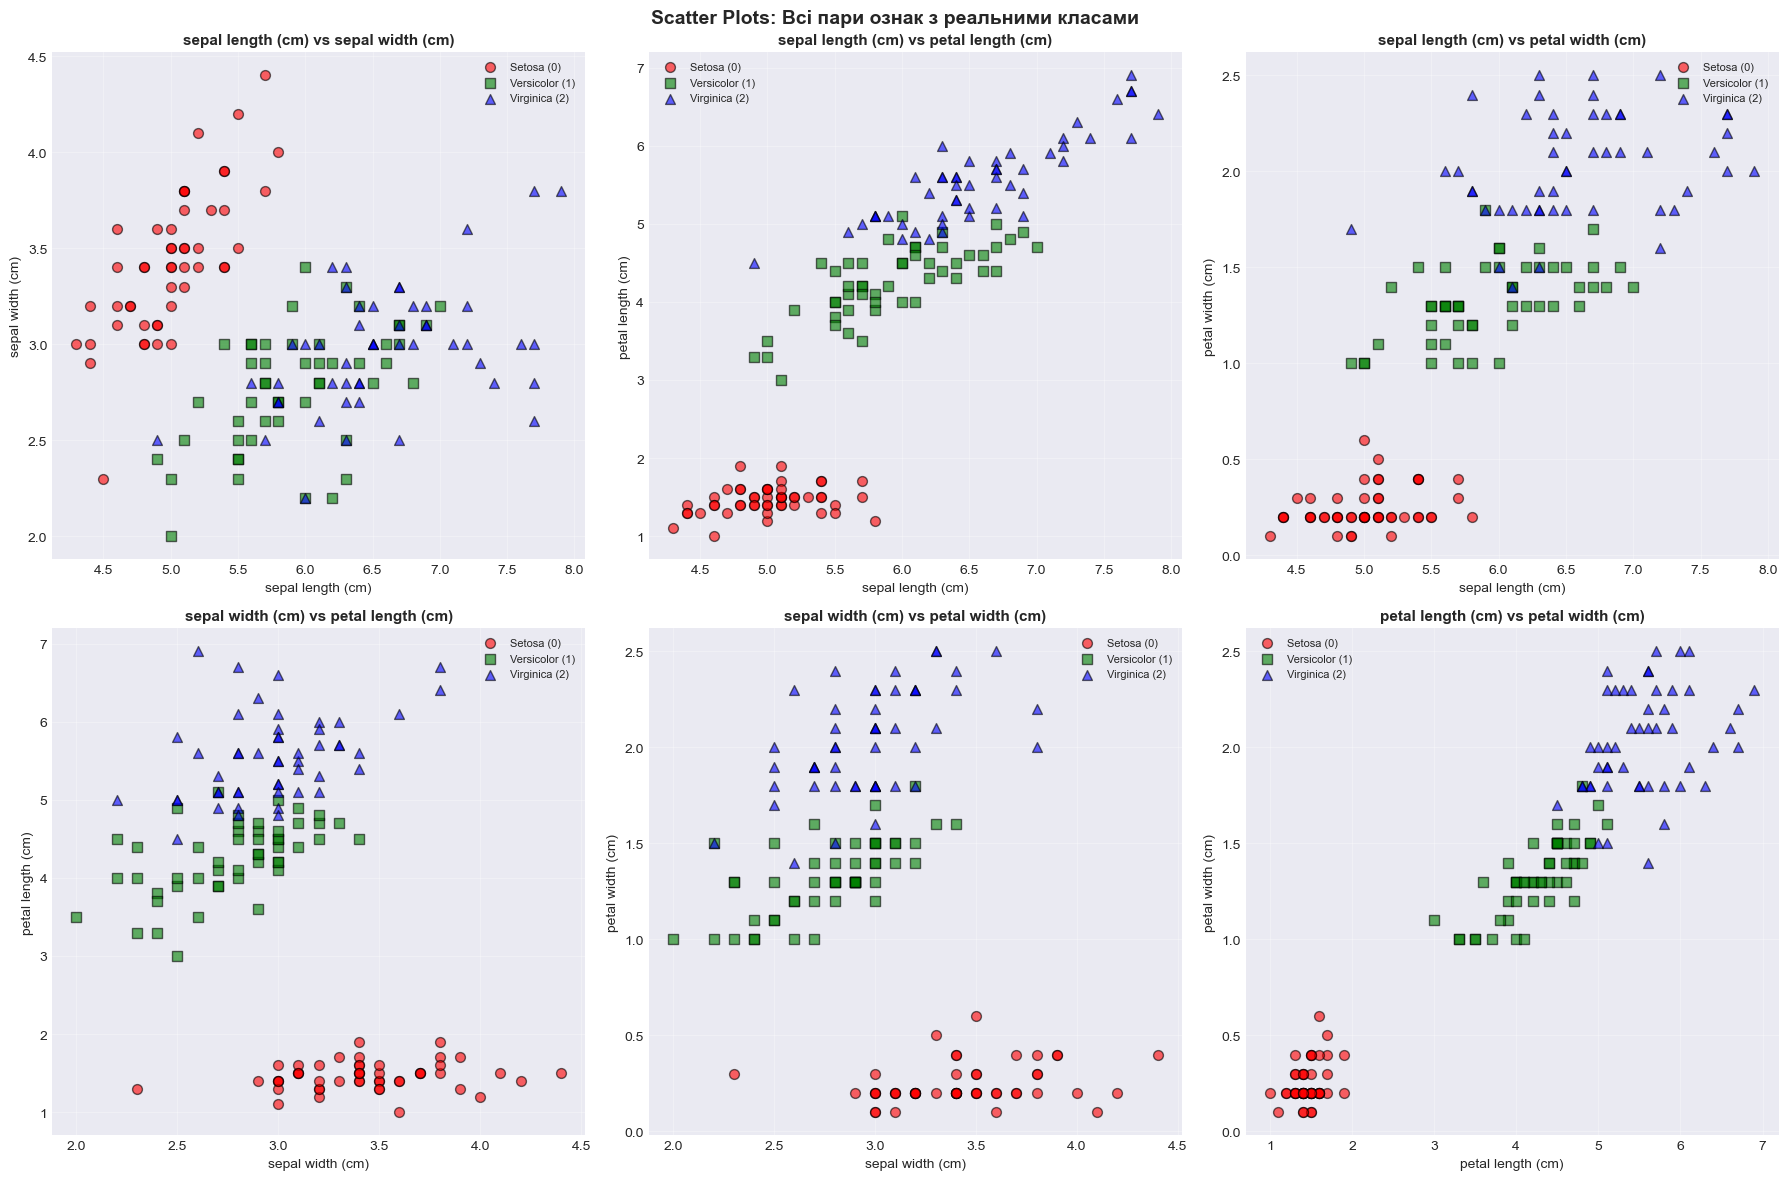


📊 Виконання PCA для візуалізації в 2D...

📉 Пояснена дисперсія (2 компоненти):
   - PC1: 0.7296 (72.96%)
   - PC2: 0.2285 (22.85%)
   - Загалом: 0.9581 (95.81%)


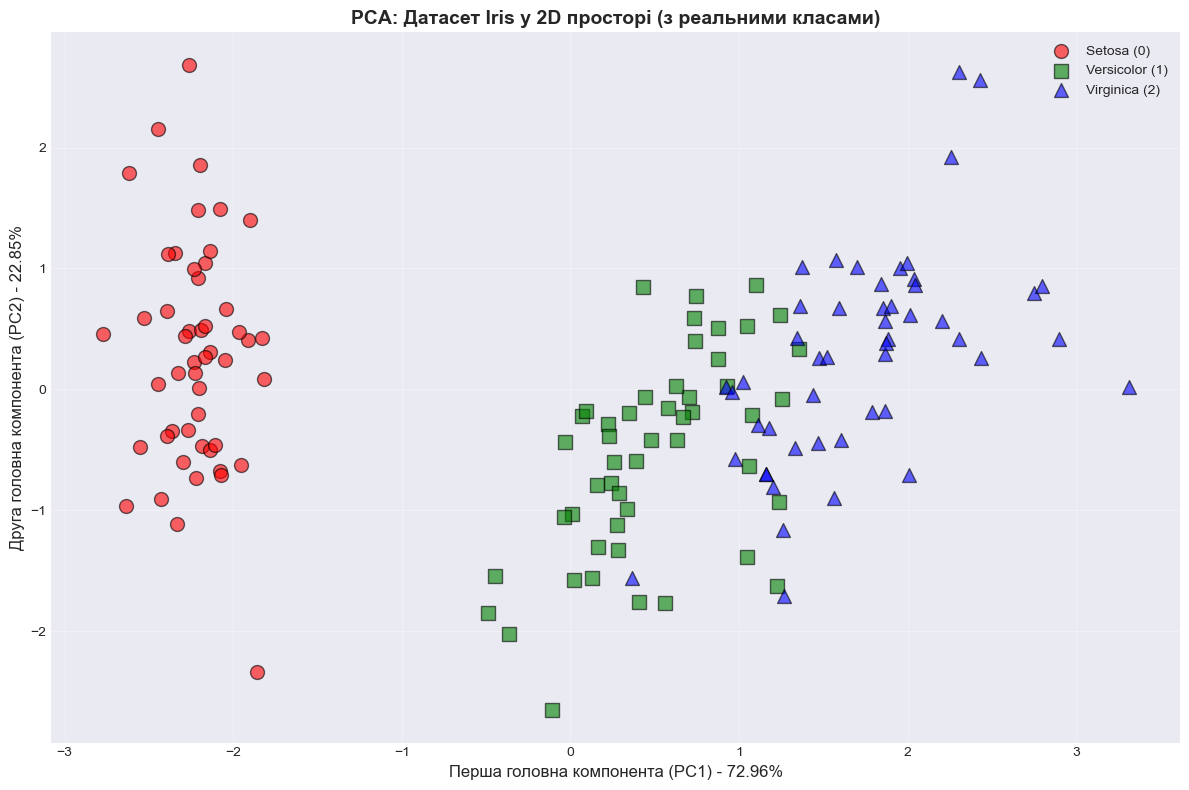


📊 Виконання PCA для візуалізації в 3D...

📉 Пояснена дисперсія (3 компоненти):
   - PC1: 0.7296 (72.96%)
   - PC2: 0.2285 (22.85%)
   - PC3: 0.0367 (3.67%)
   - Загалом: 0.9948 (99.48%)


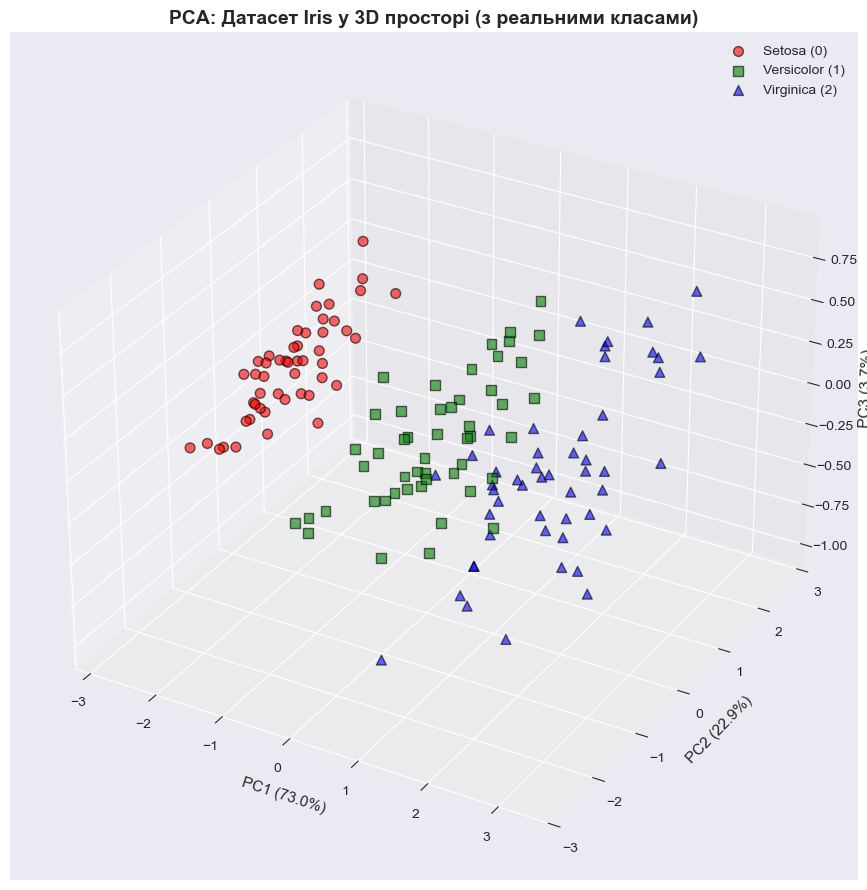


📊 Створення гістограм розподілу ознак...


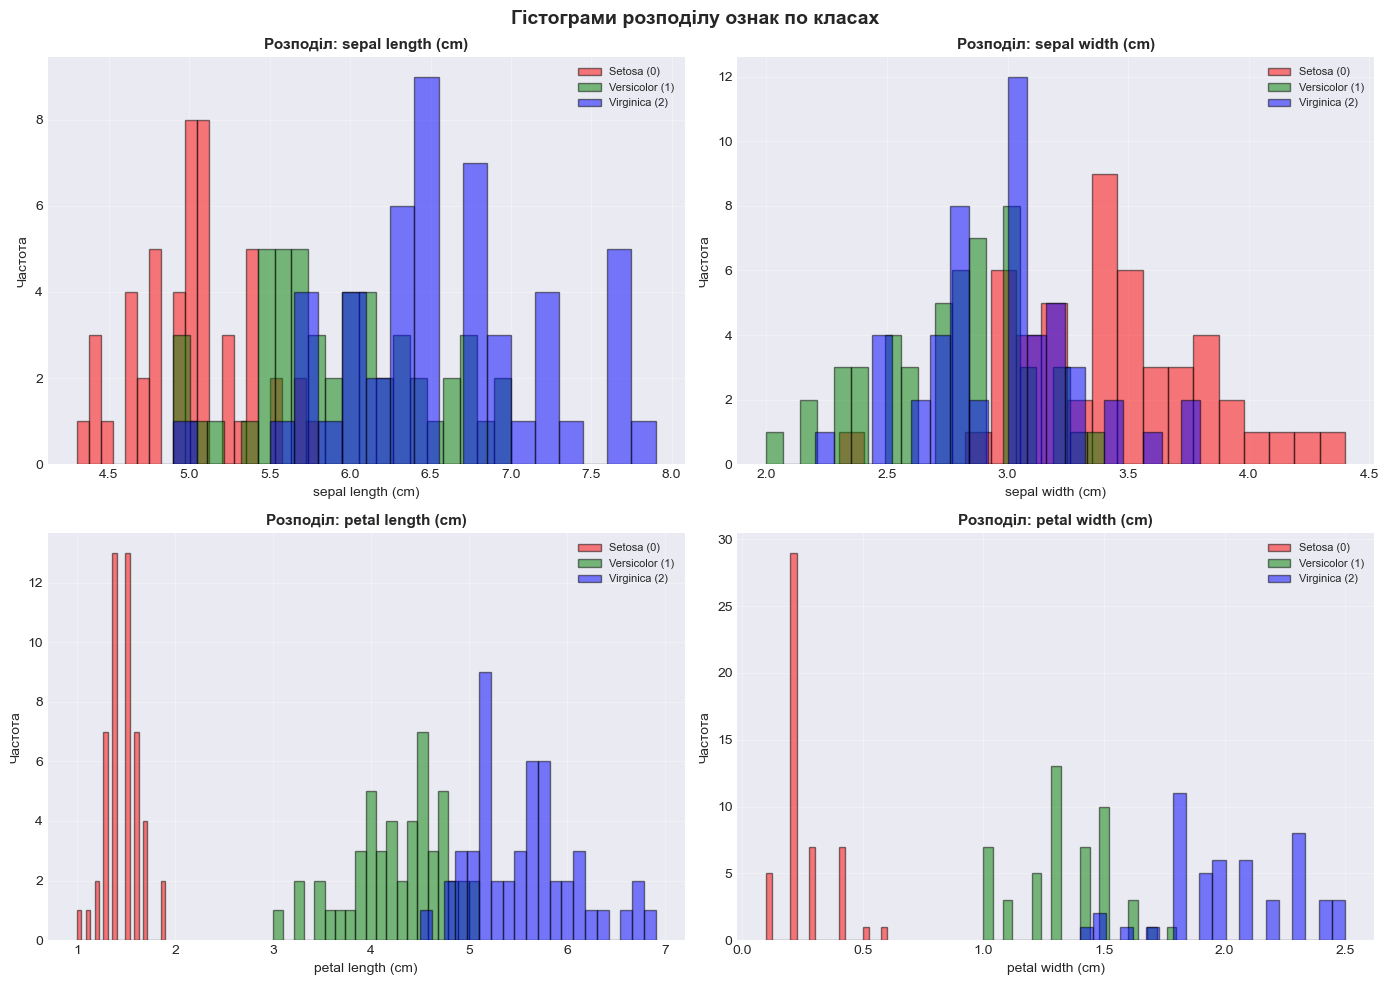


ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ

💾 Стандартизовані дані збережено: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_scaled.csv
💾 PCA дані (2D) збережено: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_pca.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Налаштування стилю графіків
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================================================
# КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ")
print("="*70)

# Визначення шляху до файлу
# У Jupyter Notebook змінна __file__ відсутня, тому обробляємо обидва варіанти
try:
    script_directory = Path(__file__).parent
except NameError:
    # __file__ не визначено в інтерактивному середовищі (наприклад, Jupyter)
    script_directory = Path().resolve()

iris_filepath = script_directory / "data" / "iris_dataset.csv"

# Завантаження даних
print(f"\n📁 Завантаження даних з: {iris_filepath}")
df = pd.read_csv(iris_filepath)

print("\n✅ Дані успішно завантажено!")

# 1.1 Базова інформація про датасет
print("\n" + "-"*70)
print("1.1 БАЗОВА ІНФОРМАЦІЯ ПРО ДАТАСЕТ")
print("-"*70)

print(f"\n📊 Розмірність датасету: {df.shape}")
print(f"   - Кількість зразків: {df.shape[0]}")
print(f"   - Кількість ознак: {df.shape[1] - 1} (без target)")

print("\n📋 Перші 5 рядків:")
print(df.head())

print("\n📋 Останні 5 рядків:")
print(df.tail())

print("\n🏷️ Типи даних:")
print(df.dtypes)

print("\n🔢 Інформація про датасет:")
df.info()

# 1.2 Статистичні характеристики
print("\n" + "-"*70)
print("1.2 СТАТИСТИЧНІ ХАРАКТЕРИСТИКИ")
print("-"*70)

print("\n📈 Описова статистика для всіх ознак:")
print(df.describe())

print("\n📊 Статистика по цільовій змінній (target):")
print(df['target'].value_counts().sort_index())

target_names = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']
print("\nРозподіл класів:")
for i, name in enumerate(target_names):
    count = (df['target'] == i).sum()
    percentage = (count / len(df)) * 100
    print(f"  {name}: {count} зразків ({percentage:.1f}%)")

# 1.3 Перевірка на пропущені значення
print("\n" + "-"*70)
print("1.3 ПЕРЕВІРКА НА ПРОПУЩЕНІ ЗНАЧЕННЯ")
print("-"*70)

missing_values = df.isnull().sum()
print("\n🔍 Кількість пропущених значень по стовпцях:")
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ Пропущені значення відсутні!")
else:
    print(f"\n⚠️ Загальна кількість пропущених значень: {missing_values.sum()}")

# 1.4 Кореляційна матриця
print("\n" + "-"*70)
print("1.4 КОРЕЛЯЦІЙНА МАТРИЦЯ МІЖ ОЗНАКАМИ")
print("-"*70)

# Відокремлюємо ознаки (без target)
feature_columns = [col for col in df.columns if col != 'target']
X = df[feature_columns].values
y = df['target'].values

correlation_matrix = df[feature_columns].corr()
print("\n📊 Кореляція між ознаками:")
print(correlation_matrix)

# ============================================================================
# КРОК 2: ВІЗУАЛІЗАЦІЯ ПОЧАТКОВИХ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("КРОК 2: ВІЗУАЛІЗАЦІЯ ПОЧАТКОВИХ ДАНИХ")
print("="*70)

# 2.1 Кореляційна матриця (heatmap)
print("\n📊 Створення теплової карти кореляцій...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Кореляційна матриця ознак датасету Iris', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.2 Box plots для кожної ознаки
print("\n📊 Створення box plots для кожної ознаки...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    axes[idx].boxplot([df[df['target'] == i][col] for i in range(3)],
                      labels=target_names)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Значення')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак по класах (Box Plots)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.3 Pair plot (матриця діаграм розсіювання)
print("\n📊 Створення pair plot (може зайняти кілька секунд)...")
pairplot_df = df.copy()
pairplot_df['species'] = pairplot_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

g = sns.pairplot(pairplot_df, hue='species', vars=feature_columns,
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
                 height=2.5)
g.fig.suptitle('Pair Plot: Всі пари ознак датасету Iris', y=1.02, fontsize=14, fontweight='bold')
plt.show()


# 2.4 Scatter plots для кожної пари ознак з реальними мітками
print("\n📊 Створення scatter plots для всіх пар ознак...")
from itertools import combinations

feature_pairs = list(combinations(range(len(feature_columns)), 2))
n_pairs = len(feature_pairs)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for idx, (i, j) in enumerate(feature_pairs):
    for class_idx in range(3):
        mask = y == class_idx
        axes[idx].scatter(X[mask, i], X[mask, j], 
                         c=colors[class_idx], 
                         marker=markers[class_idx],
                         label=target_names[class_idx],
                         alpha=0.6, 
                         edgecolors='k',
                         s=50)
    
    axes[idx].set_xlabel(feature_columns[i], fontsize=10)
    axes[idx].set_ylabel(feature_columns[j], fontsize=10)
    axes[idx].set_title(f'{feature_columns[i]} vs {feature_columns[j]}', 
                       fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plots: Всі пари ознак з реальними класами', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.5 PCA для зменшення розмірності та візуалізації
print("\n📊 Виконання PCA для візуалізації в 2D...")

# Стандартизація даних (важливо для PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA з 2 компонентами
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n📉 Пояснена дисперсія (2 компоненти):")
print(f"   - PC1: {pca_2d.explained_variance_ratio_[0]:.4f} ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   - PC2: {pca_2d.explained_variance_ratio_[1]:.4f} ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   - Загалом: {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.2f}%)")

# Візуалізація PCA 2D
plt.figure(figsize=(12, 8))
for class_idx in range(3):
    mask = y == class_idx
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=colors[class_idx],
               marker=markers[class_idx],
               label=target_names[class_idx],
               alpha=0.6,
               edgecolors='k',
               s=100)

plt.xlabel(f'Перша головна компонента (PC1) - {pca_2d.explained_variance_ratio_[0]*100:.2f}%', 
           fontsize=12)
plt.ylabel(f'Друга головна компонента (PC2) - {pca_2d.explained_variance_ratio_[1]*100:.2f}%', 
           fontsize=12)
plt.title('PCA: Датасет Iris у 2D просторі (з реальними класами)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 2.6 PCA з 3 компонентами для 3D візуалізації
print("\n📊 Виконання PCA для візуалізації в 3D...")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n📉 Пояснена дисперсія (3 компоненти):")
for i in range(3):
    print(f"   - PC{i+1}: {pca_3d.explained_variance_ratio_[i]:.4f} ({pca_3d.explained_variance_ratio_[i]*100:.2f}%)")
print(f"   - Загалом: {sum(pca_3d.explained_variance_ratio_):.4f} ({sum(pca_3d.explained_variance_ratio_)*100:.2f}%)")

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for class_idx in range(3):
    mask = y == class_idx
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=colors[class_idx],
              marker=markers[class_idx],
              label=target_names[class_idx],
              alpha=0.6,
              edgecolors='k',
              s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax.set_title('PCA: Датасет Iris у 3D просторі (з реальними класами)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


# 2.7 Розподіл кожної ознаки (гістограми)
print("\n📊 Створення гістограм розподілу ознак...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    for class_idx in range(3):
        mask = y == class_idx
        axes[idx].hist(X[mask, idx], bins=20, alpha=0.5, 
                      label=target_names[class_idx], 
                      color=colors[class_idx],
                      edgecolor='black')
    
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Частота', fontsize=10)
    axes[idx].set_title(f'Розподіл: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Гістограми розподілу ознак по класах', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ============================================================================
# ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ")
print("="*70)

# Збереження стандартизованих даних для подальшого використання
scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)
scaled_df['target'] = y
scaled_filepath = script_directory / "data" / "iris_scaled.csv"
scaled_df.to_csv(scaled_filepath, index=False)
print(f"\n💾 Стандартизовані дані збережено: {scaled_filepath}")

# Збереження PCA даних
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_filepath = script_directory / "data" / "iris_pca.csv"
pca_df.to_csv(pca_filepath, index=False)
print(f"💾 PCA дані (2D) збережено: {pca_filepath}")


КРОК 3-4: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH ТА ВІЗУАЛІЗАЦІЯ

----------------------------------------------------------------------
СТАНДАРТИЗАЦІЯ ТА НАВЧАННЯ МОДЕЛІ
----------------------------------------------------------------------

Час навчання: 0.004456 сек
Кількість кластерів: 3
Розподіл об'єктів: [71 49 30]

----------------------------------------------------------------------
ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ
----------------------------------------------------------------------


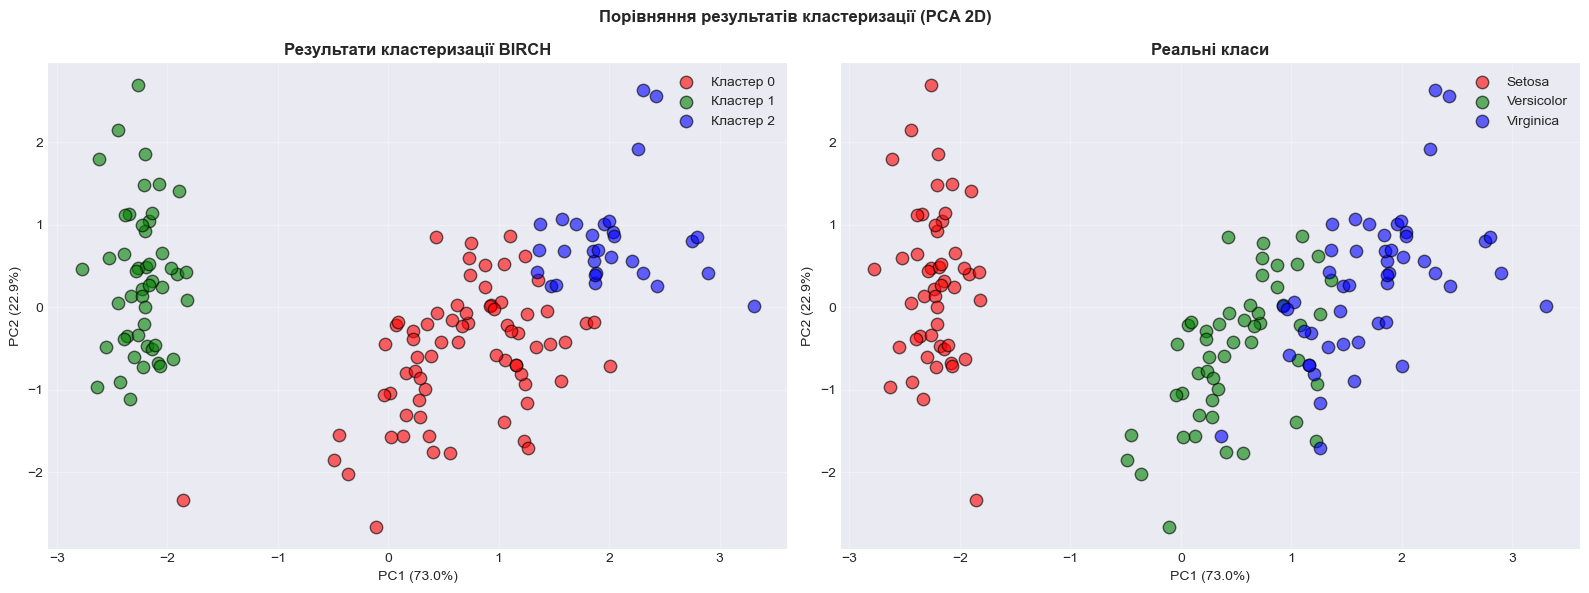

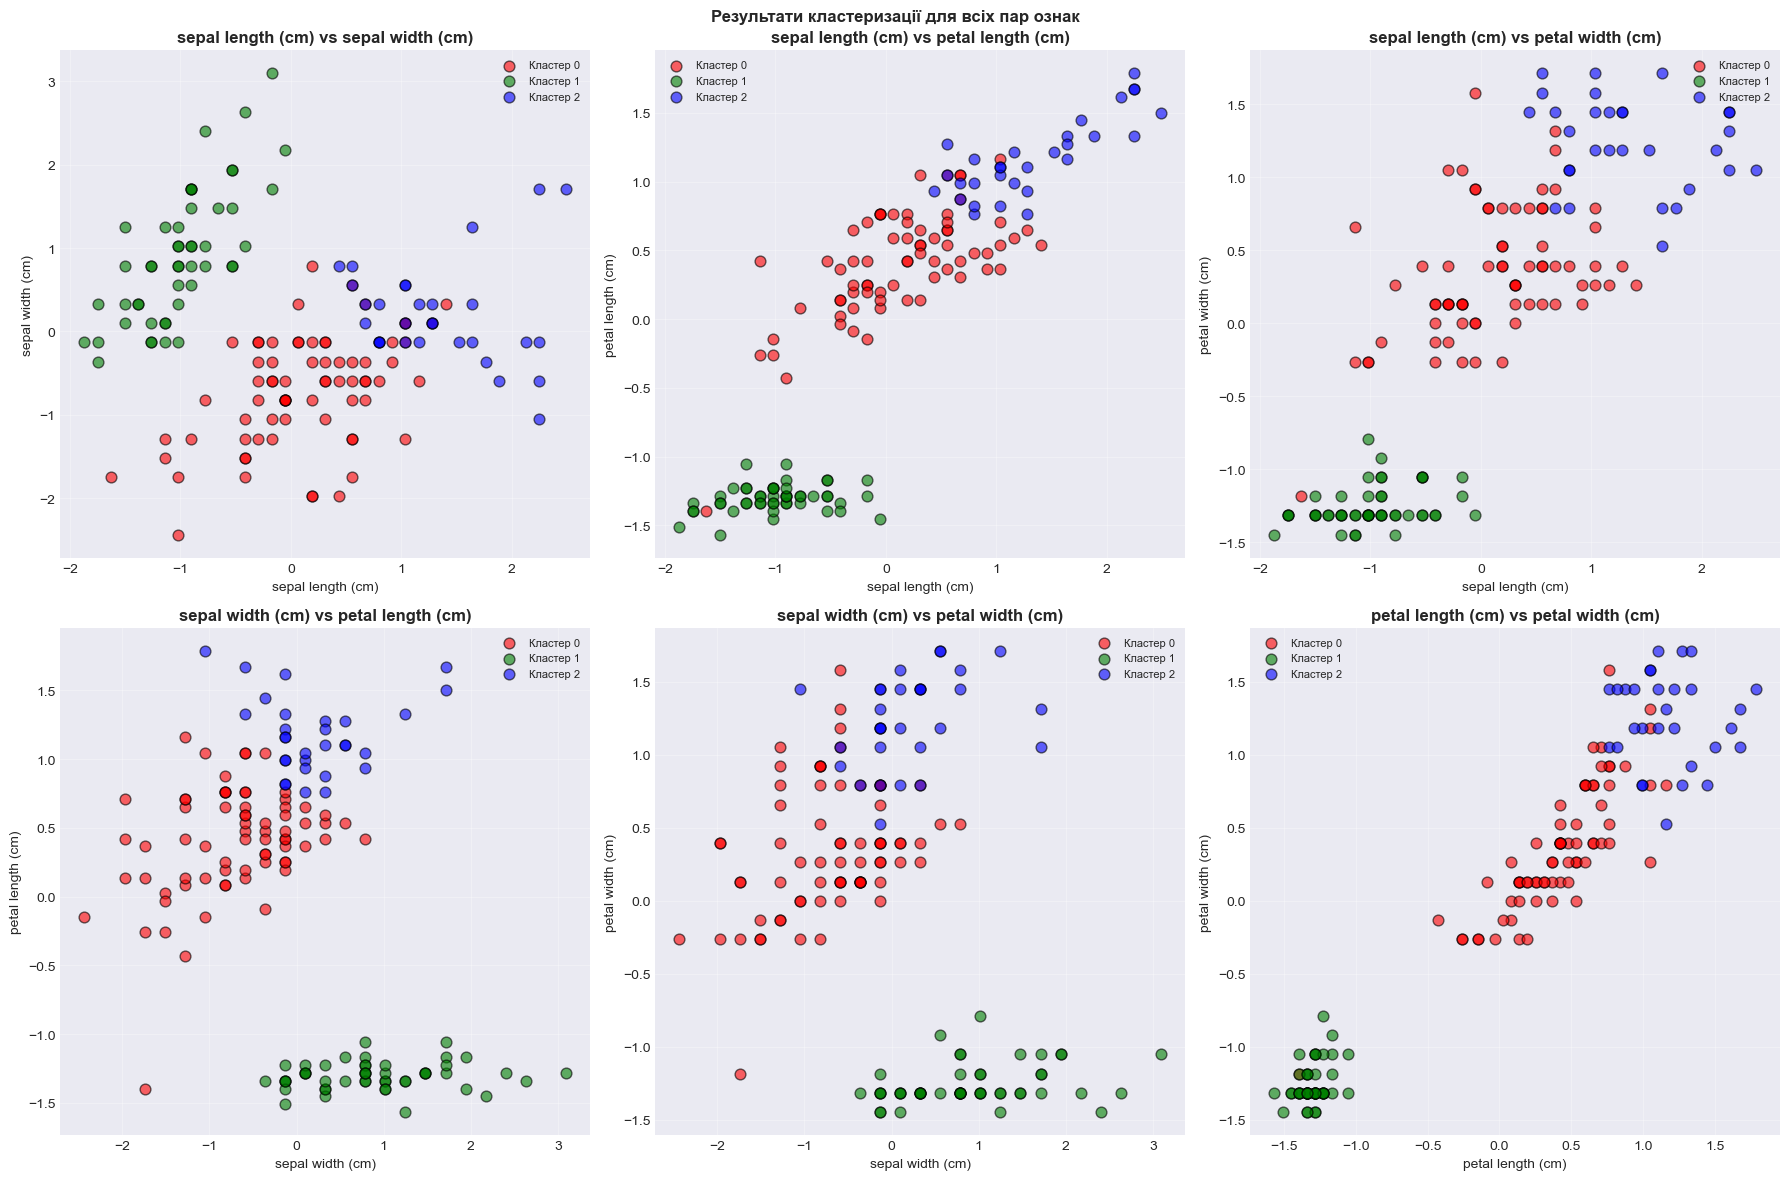

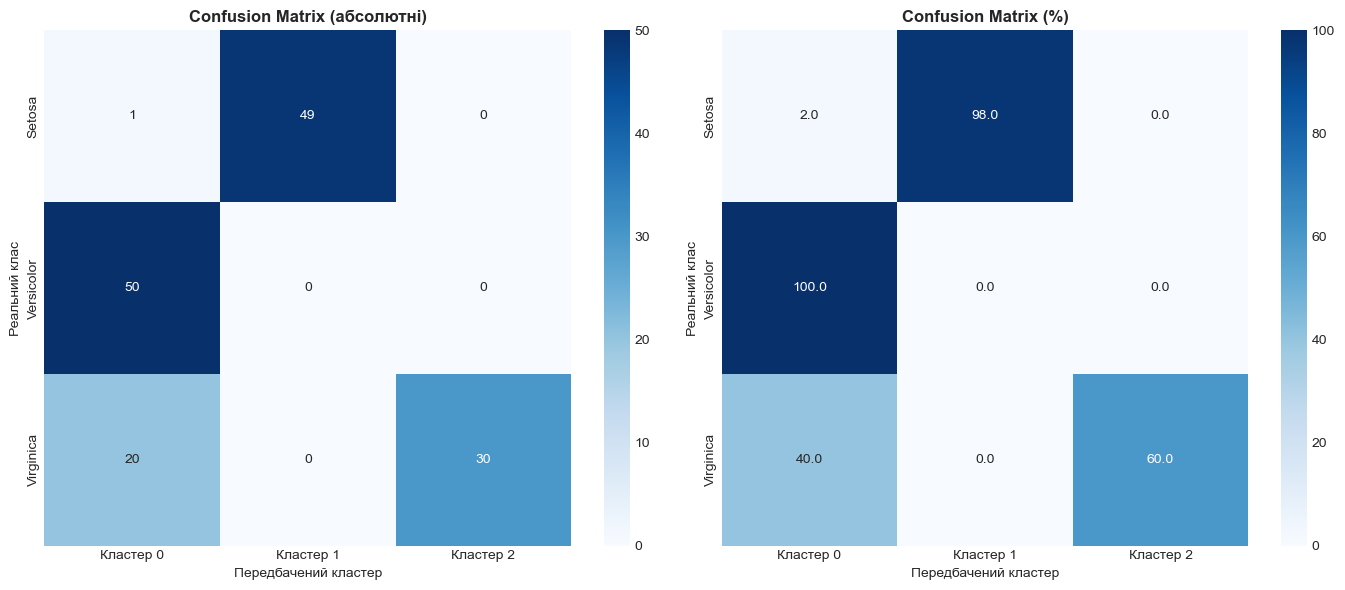


Аналіз відповідності:
Кластер 0 -> Versicolor (70.4%)
Кластер 1 -> Setosa (100.0%)
Кластер 2 -> Virginica (100.0%)


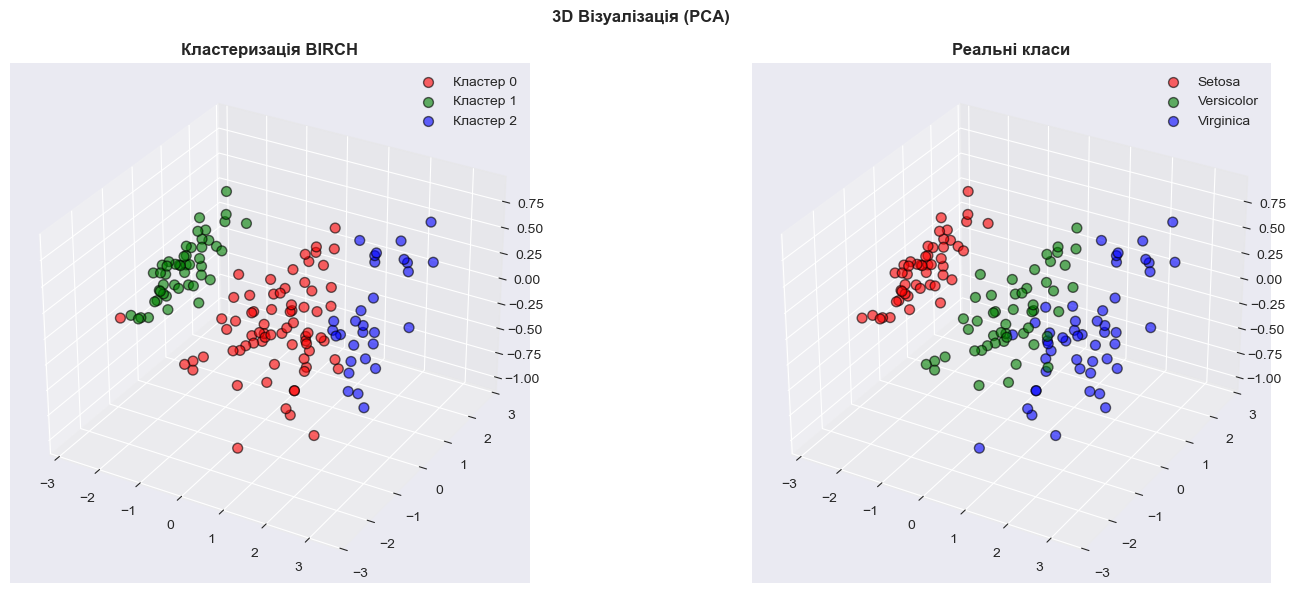

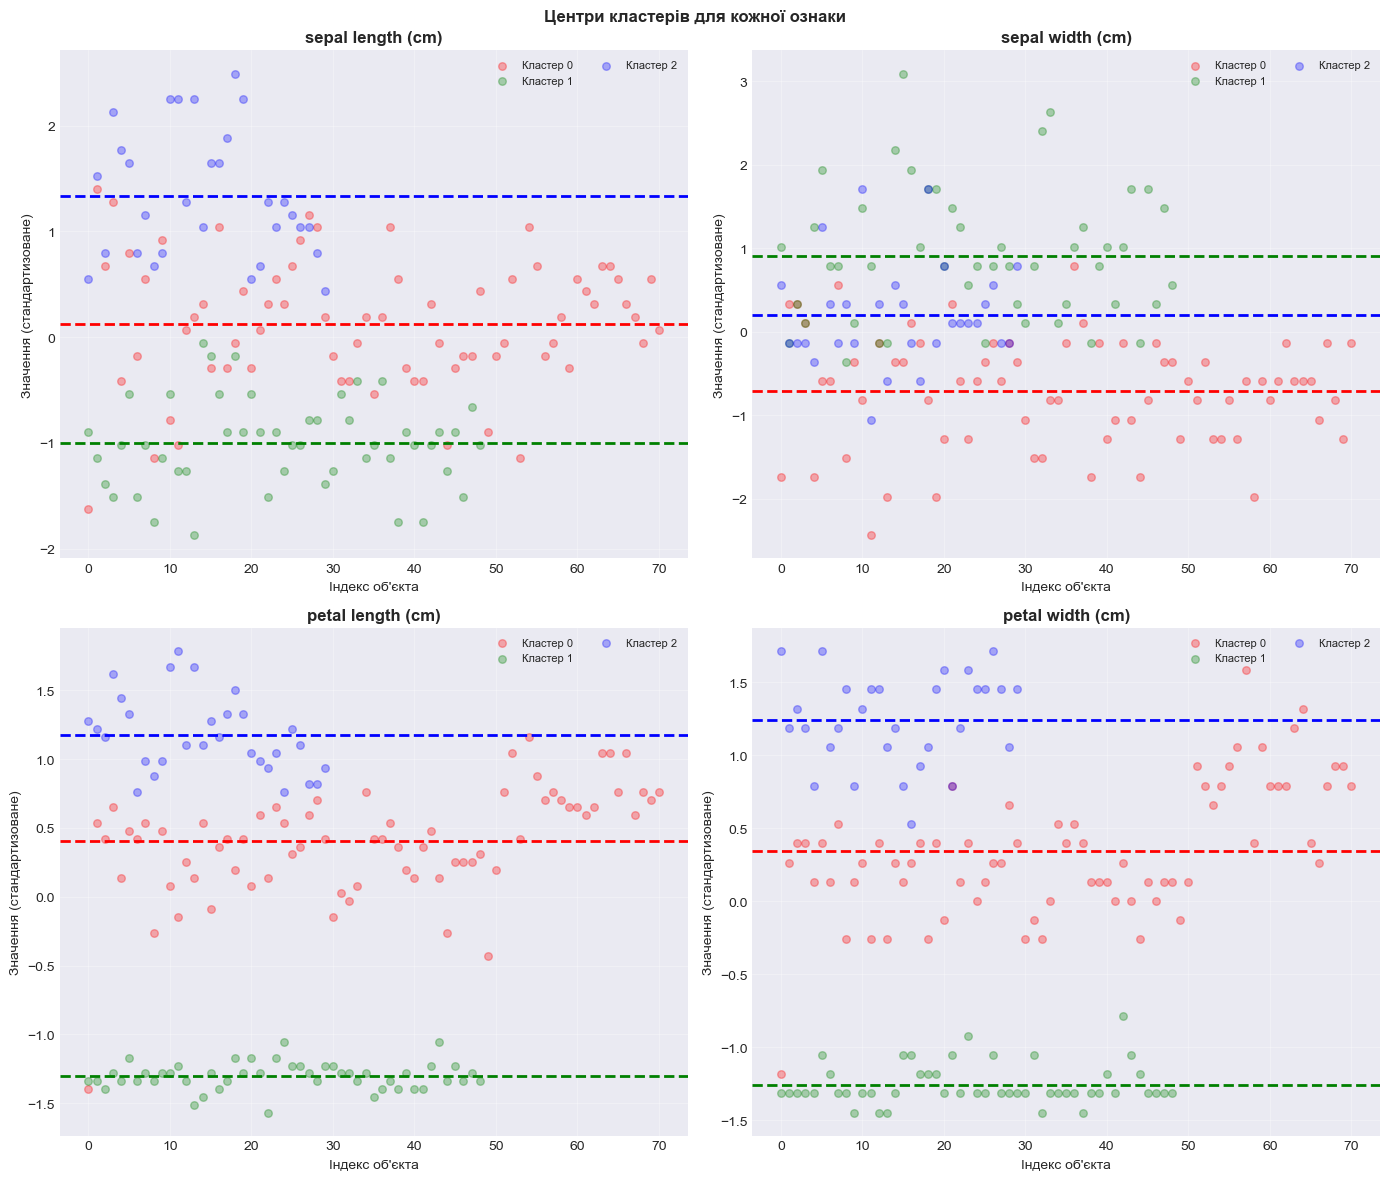

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from itertools import combinations
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("КРОК 3-4: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH ТА ВІЗУАЛІЗАЦІЯ")
print("="*70)



# ============================================================================
# КРОК 3: ПОБУДОВА БАЗОВОЇ МОДЕЛІ
# ============================================================================

print("\n" + "-"*70)
print("СТАНДАРТИЗАЦІЯ ТА НАВЧАННЯ МОДЕЛІ")
print("-"*70)

# Стандартизація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Базова модель BIRCH
birch_base = Birch(n_clusters=3, threshold=0.5, branching_factor=50)

start_time = time.time()
labels_base = birch_base.fit_predict(X_scaled)
training_time = time.time() - start_time

print(f"\nЧас навчання: {training_time:.6f} сек")
print(f"Кількість кластерів: {len(np.unique(labels_base))}")
print(f"Розподіл об'єктів: {np.bincount(labels_base)}")

# ============================================================================
# КРОК 4: ВІЗУАЛІЗАЦІЯ
# ============================================================================

print("\n" + "-"*70)
print("ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ")
print("-"*70)

# PCA для візуалізації
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

colors = ['red', 'green', 'blue']
target_names = ['Setosa', 'Versicolor', 'Virginica']

# 1. Порівняння з реальними класами (PCA 2D)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[cluster_id],
                   label=f'Кластер {cluster_id}', alpha=0.6, edgecolors='k', s=80)

axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Результати кластеризації BIRCH', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for class_id in np.unique(y):
    mask = y == class_id
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[class_id],
                   label=target_names[class_id], alpha=0.6, edgecolors='k', s=80)

axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('Реальні класи', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Порівняння результатів кластеризації (PCA 2D)', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_08_birch_base_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Всі пари ознак
feature_pairs = list(combinations(range(len(feature_columns)), 2))
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (i, j) in enumerate(feature_pairs):
    for cluster_id in np.unique(labels_base):
        mask = labels_base == cluster_id
        axes[idx].scatter(X_scaled[mask, i], X_scaled[mask, j], c=colors[cluster_id],
                         label=f'Кластер {cluster_id}', alpha=0.6, edgecolors='k', s=60)
    
    axes[idx].set_xlabel(feature_columns[i])
    axes[idx].set_ylabel(feature_columns[j])
    axes[idx].set_title(f'{feature_columns[i]} vs {feature_columns[j]}', fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Результати кластеризації для всіх пар ознак', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_09_birch_all_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y, labels_base)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Кластер {i}' for i in range(3)],
            yticklabels=target_names, ax=axes[0])
axes[0].set_xlabel('Передбачений кластер')
axes[0].set_ylabel('Реальний клас')
axes[0].set_title('Confusion Matrix (абсолютні)', fontweight='bold')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=[f'Кластер {i}' for i in range(3)],
            yticklabels=target_names, ax=axes[1])
axes[1].set_xlabel('Передбачений кластер')
axes[1].set_ylabel('Реальний клас')
axes[1].set_title('Confusion Matrix (%)', fontweight='bold')

plt.tight_layout()
plt.savefig(script_directory / 'iris_10_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nАналіз відповідності:")
for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    classes = y[mask]
    unique, counts = np.unique(classes, return_counts=True)
    dominant = unique[np.argmax(counts)]
    percentage = (np.max(counts) / len(classes)) * 100
    print(f"Кластер {cluster_id} -> {target_names[dominant]} ({percentage:.1f}%)")

# 4. 3D візуалізація
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    ax1.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=colors[cluster_id], label=f'Кластер {cluster_id}',
               alpha=0.6, edgecolors='k', s=50)
ax1.set_title('Кластеризація BIRCH', fontweight='bold')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
for class_id in np.unique(y):
    mask = y == class_id
    ax2.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=colors[class_id], label=target_names[class_id],
               alpha=0.6, edgecolors='k', s=50)
ax2.set_title('Реальні класи', fontweight='bold')
ax2.legend()

plt.suptitle('3D Візуалізація (PCA)', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_11_birch_3d.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Центри кластерів
cluster_centers = np.array([X_scaled[labels_base == i].mean(axis=0) for i in range(3)])

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx in range(len(feature_columns)):
    for cluster_id in np.unique(labels_base):
        mask = labels_base == cluster_id
        axes[idx].scatter(range(np.sum(mask)), X_scaled[mask, idx],
                         c=colors[cluster_id], alpha=0.3, s=30,
                         label=f'Кластер {cluster_id}')
    
    for cluster_id in range(3):
        axes[idx].axhline(y=cluster_centers[cluster_id, idx],
                         color=colors[cluster_id], linestyle='--', linewidth=2)
    
    axes[idx].set_xlabel('Індекс об\'єкта')
    axes[idx].set_ylabel('Значення (стандартизоване)')
    axes[idx].set_title(f'{feature_columns[idx]}', fontweight='bold')
    axes[idx].legend(fontsize=8, ncol=2)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Центри кластерів для кожної ознаки', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_12_cluster_centers.png', dpi=300, bbox_inches='tight')
plt.show()





КРОК 5: ОЦІНКА ШВИДКОДІЇ АЛГОРИТМУ BIRCH

----------------------------------------------------------------------
БАЗОВИЙ НАБІР (150 зразків)
----------------------------------------------------------------------
Середній час: 3.3925 мс
Стандартне відхилення: 0.7188 мс
Min: 2.8188 мс, Max: 5.6074 мс

----------------------------------------------------------------------
ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ
----------------------------------------------------------------------

Генерація 1,000 зразків...
Час кластеризації: 0.0456 сек (45.57 мс)
Час на зразок: 45.57 мкс

Генерація 5,000 зразків...
Час кластеризації: 0.1605 сек (160.52 мс)
Час на зразок: 32.10 мкс

Генерація 10,000 зразків...
Час кластеризації: 0.2818 сек (281.84 мс)
Час на зразок: 28.18 мкс

Генерація 50,000 зразків...
Час кластеризації: 1.2985 сек (1298.49 мс)
Час на зразок: 25.97 мкс

Генерація 100,000 зразків...
Час кластеризації: 2.4972 сек (2497.23 мс)
Час на зразок: 24.97 мкс

Генерація 500,000 зразків...
Час кластеризації

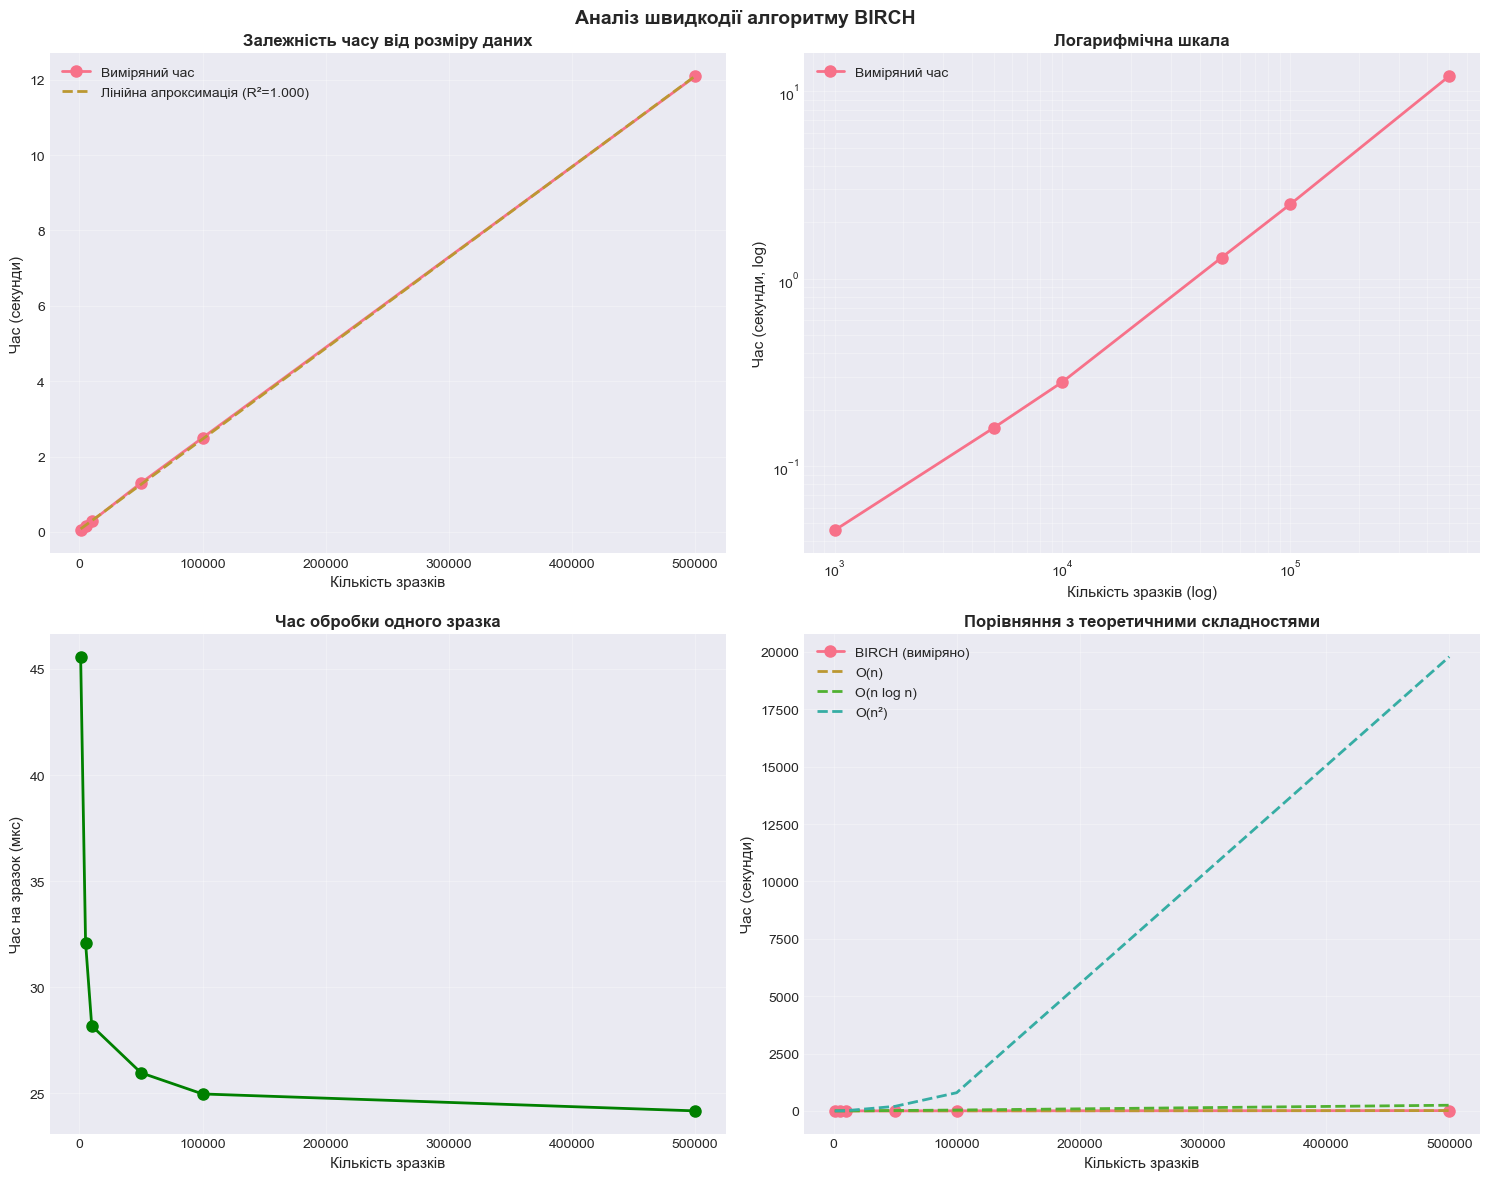

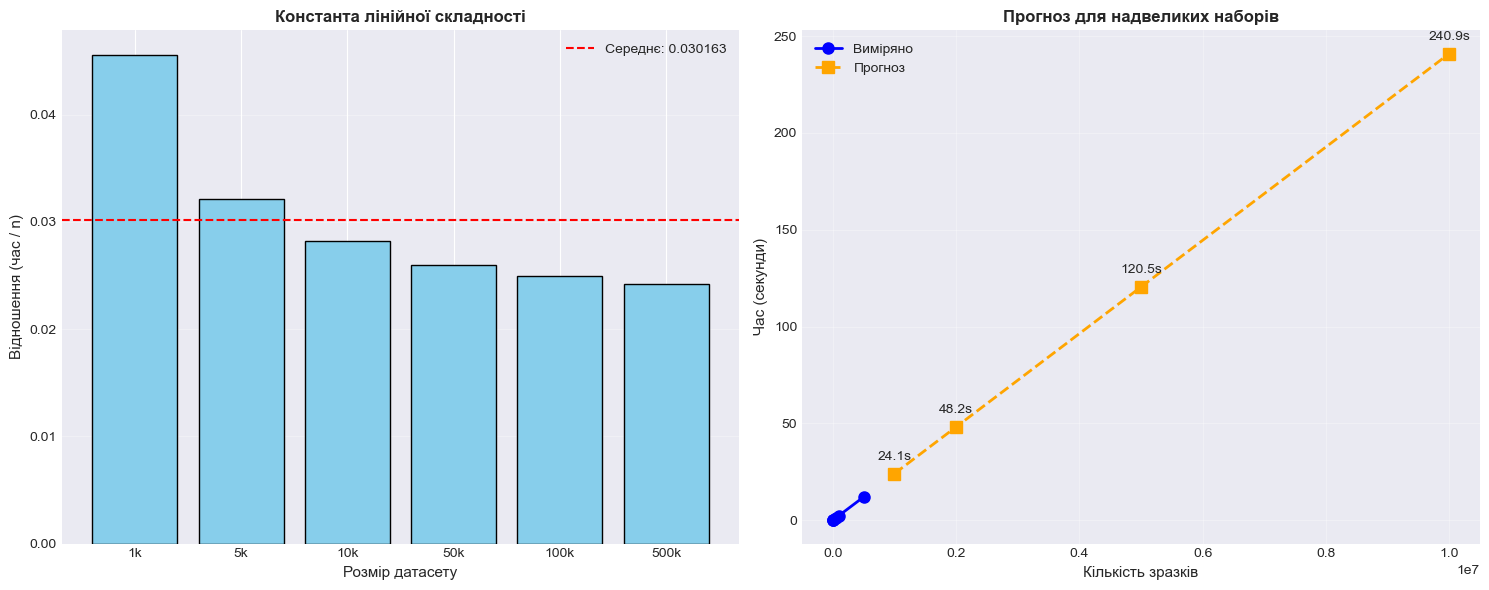


----------------------------------------------------------------------
ПРОГНОЗИ ДЛЯ НАДВЕЛИКИХ НАБОРІВ
----------------------------------------------------------------------
n=1,000,000 (1M): ~24.14 сек (0.40 хв)
n=2,000,000 (2M): ~48.23 сек (0.80 хв)
n=5,000,000 (5M): ~120.48 сек (2.01 хв)
n=10,000,000 (10M): ~240.91 сек (4.02 хв)

----------------------------------------------------------------------
ВИСНОВКИ ПРО ШВИДКОДІЮ
----------------------------------------------------------------------

1. Базовий набір (150): 3.3925 мс
2. Масштабованість: алгоритм демонструє лінійну складність O(n)
3. R² = 1.0000 - відмінна відповідність лінійній моделі
4. Час на зразок стабілізується на рівні ~30.16 мкс
5. Для 1M зразків прогнозований час: ~24.14 сек
6. Алгоритм BIRCH підходить для надвеликих наборів даних

Порівняння з іншими алгоритмами:
- K-Means: O(n * k * i) - де k кластерів, i ітерацій
- Agglomerative: O(n³) - дуже повільно для великих n
- DBSCAN: O(n log n) - швидко, але складно нала

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

print("="*70)
print("КРОК 5: ОЦІНКА ШВИДКОДІЇ АЛГОРИТМУ BIRCH")
print("="*70)



# ============================================================================
# ВИМІРЮВАННЯ ЧАСУ НА БАЗОВОМУ НАБОРІ
# ============================================================================

print("\n" + "-"*70)
print("БАЗОВИЙ НАБІР (150 зразків)")
print("-"*70)

birch = Birch(n_clusters=3, threshold=0.5, branching_factor=50)

# Багаторазове вимірювання для точності
n_iterations = 100
times = []

for _ in range(n_iterations):
    start = time.time()
    birch.fit(X_scaled)
    times.append(time.time() - start)

base_time_mean = np.mean(times)
base_time_std = np.std(times)

print(f"Середній час: {base_time_mean*1000:.4f} мс")
print(f"Стандартне відхилення: {base_time_std*1000:.4f} мс")
print(f"Min: {min(times)*1000:.4f} мс, Max: {max(times)*1000:.4f} мс")

# ============================================================================
# ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ
# ============================================================================

print("\n" + "-"*70)
print("ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ")
print("-"*70)

# Розміри для тестування
sizes = [1000, 5000, 10000, 50000, 100000, 500000]
results = []

for n_samples in sizes:
    print(f"\nГенерація {n_samples:,} зразків...")
    
    # Створення синтетичних даних схожої структури
    X_large, _ = make_classification(
        n_samples=n_samples,
        n_features=4,
        n_informative=4,
        n_redundant=0,
        n_clusters_per_class=1,
        n_classes=3,
        random_state=42
    )
    
    # Стандартизація
    X_large_scaled = StandardScaler().fit_transform(X_large)
    
    # Вимірювання часу (3 запуски для надійності)
    times_large = []
    for _ in range(3):
        start = time.time()
        birch.fit(X_large_scaled)
        times_large.append(time.time() - start)
    
    mean_time = np.mean(times_large)
    
    results.append({
        'n_samples': n_samples,
        'time': mean_time,
        'time_per_sample': mean_time / n_samples * 1000000  # мікросекунди
    })
    
    print(f"Час кластеризації: {mean_time:.4f} сек ({mean_time*1000:.2f} мс)")
    print(f"Час на зразок: {mean_time/n_samples*1000000:.2f} мкс")

results_df = pd.DataFrame(results)

print("\n" + "-"*70)
print("ЗВЕДЕНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ")
print("-"*70)
print(results_df.to_string(index=False))

# ============================================================================
# АНАЛІЗ СКЛАДНОСТІ
# ============================================================================

print("\n" + "-"*70)
print("АНАЛІЗ СКЛАДНОСТІ АЛГОРИТМУ")
print("-"*70)

# Відношення часу до лінійної складності
results_df['linear_ratio'] = results_df['time'] / (results_df['n_samples'] / 1000)

# Перевірка на лінійну складність
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    results_df['n_samples'], results_df['time']
)

print(f"\nЛінійна регресія: time = {slope:.8f} * n_samples + {intercept:.4f}")
print(f"R² (коефіцієнт детермінації): {r_value**2:.4f}")
print(f"Теоретична складність BIRCH: O(n)")

if r_value**2 > 0.95:
    print("Результат: Алгоритм демонструє ЛІНІЙНУ складність")
else:
    print("Результат: Складність відрізняється від лінійної")

# Обчислення прискорення відносно квадратичної складності
print("\nПорівняння з квадратичною складністю:")
for _, row in results_df.iterrows():
    n = row['n_samples']
    linear_estimate = slope * n + intercept
    quadratic_estimate = linear_estimate * (n / 1000)  # якби була O(n²)
    speedup = quadratic_estimate / row['time']
    print(f"n={n:,}: прискорення ~{speedup:.1f}x порівняно з O(n²)")

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 1: ЧАС vs РОЗМІР
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Абсолютний час (лінійна шкала)
axes[0, 0].plot(results_df['n_samples'], results_df['time'], 
                'o-', linewidth=2, markersize=8, label='Виміряний час')
axes[0, 0].plot(results_df['n_samples'], 
                slope * results_df['n_samples'] + intercept,
                '--', linewidth=2, label=f'Лінійна апроксимація (R²={r_value**2:.3f})')
axes[0, 0].set_xlabel('Кількість зразків', fontsize=11)
axes[0, 0].set_ylabel('Час (секунди)', fontsize=11)
axes[0, 0].set_title('Залежність часу від розміру даних', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Логарифмічна шкала
axes[0, 1].loglog(results_df['n_samples'], results_df['time'], 
                  'o-', linewidth=2, markersize=8, label='Виміряний час')
axes[0, 1].set_xlabel('Кількість зразків (log)', fontsize=11)
axes[0, 1].set_ylabel('Час (секунди, log)', fontsize=11)
axes[0, 1].set_title('Логарифмічна шкала', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, which='both')

# 3. Час на один зразок
axes[1, 0].plot(results_df['n_samples'], results_df['time_per_sample'],
                'o-', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('Кількість зразків', fontsize=11)
axes[1, 0].set_ylabel('Час на зразок (мкс)', fontsize=11)
axes[1, 0].set_title('Час обробки одного зразка', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Порівняння з різними складностями
n_range = np.array(results_df['n_samples'])
t_linear = slope * n_range + intercept
t_quadratic = t_linear[0] * (n_range / n_range[0]) ** 2
t_nlogn = t_linear[0] * (n_range / n_range[0]) * np.log(n_range / n_range[0] + 1)

axes[1, 1].plot(n_range, results_df['time'], 'o-', linewidth=2, 
                markersize=8, label='BIRCH (виміряно)')
axes[1, 1].plot(n_range, t_linear, '--', linewidth=2, label='O(n)')
axes[1, 1].plot(n_range, t_nlogn, '--', linewidth=2, label='O(n log n)')
axes[1, 1].plot(n_range, t_quadratic, '--', linewidth=2, label='O(n²)')
axes[1, 1].set_xlabel('Кількість зразків', fontsize=11)
axes[1, 1].set_ylabel('Час (секунди)', fontsize=11)
axes[1, 1].set_title('Порівняння з теоретичними складностями', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Аналіз швидкодії алгоритму BIRCH', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 2: ДЕТАЛІЗОВАНИЙ АНАЛІЗ
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Співвідношення з лінійною складністю
axes[0].bar(range(len(results_df)), results_df['linear_ratio'], 
            color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(results_df)))
axes[0].set_xticklabels([f'{n//1000}k' for n in results_df['n_samples']])
axes[0].set_xlabel('Розмір датасету', fontsize=11)
axes[0].set_ylabel('Відношення (час / n)', fontsize=11)
axes[0].set_title('Константа лінійної складності', fontweight='bold')
axes[0].axhline(y=results_df['linear_ratio'].mean(), color='red', 
                linestyle='--', label=f'Середнє: {results_df["linear_ratio"].mean():.6f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Прогноз для надвеликих наборів
future_sizes = [1000000, 2000000, 5000000, 10000000]
future_times = [slope * n + intercept for n in future_sizes]

all_sizes = list(results_df['n_samples']) + future_sizes
all_times = list(results_df['time']) + future_times

axes[1].plot(results_df['n_samples'], results_df['time'], 
             'o-', linewidth=2, markersize=8, label='Виміряно', color='blue')
axes[1].plot(future_sizes, future_times, 
             's--', linewidth=2, markersize=8, label='Прогноз', color='orange')
axes[1].set_xlabel('Кількість зразків', fontsize=11)
axes[1].set_ylabel('Час (секунди)', fontsize=11)
axes[1].set_title('Прогноз для надвеликих наборів', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Додавання міток для прогнозованих значень
for size, t in zip(future_sizes, future_times):
    axes[1].annotate(f'{t:.1f}s', (size, t), 
                    textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# ============================================================================
# ПРОГНОЗИ ТА ВИСНОВКИ
# ============================================================================

print("\n" + "-"*70)
print("ПРОГНОЗИ ДЛЯ НАДВЕЛИКИХ НАБОРІВ")
print("-"*70)

for size, predicted_time in zip(future_sizes, future_times):
    print(f"n={size:,} ({size/1000000:.0f}M): ~{predicted_time:.2f} сек ({predicted_time/60:.2f} хв)")

print("\n" + "-"*70)
print("ВИСНОВКИ ПРО ШВИДКОДІЮ")
print("-"*70)

print(f"""
1. Базовий набір (150): {base_time_mean*1000:.4f} мс
2. Масштабованість: алгоритм демонструє лінійну складність O(n)
3. R² = {r_value**2:.4f} - відмінна відповідність лінійній моделі
4. Час на зразок стабілізується на рівні ~{results_df['time_per_sample'].mean():.2f} мкс
5. Для 1M зразків прогнозований час: ~{future_times[0]:.2f} сек
6. Алгоритм BIRCH підходить для надвеликих наборів даних

Порівняння з іншими алгоритмами:
- K-Means: O(n * k * i) - де k кластерів, i ітерацій
- Agglomerative: O(n³) - дуже повільно для великих n
- DBSCAN: O(n log n) - швидко, але складно налаштувати
- BIRCH: O(n) - найкраща масштабованість
""")

print("="*70)
print("КРОК 5 ЗАВЕРШЕНО")
print("="*70)